<a href="https://colab.research.google.com/github/Diogoa83/Diogoa83/blob/main/Analise_com_predi%C3%A7%C3%B5es_com_produto_convenio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [25]:
import mplcyberpunk
import pandas as pd
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta

plt.style.use("cyberpunk")

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Dados/Producao.csv', sep=';')


# **Analisar uma serie historica do valor base de cada produto/Convenio e suas projeções, e quanto cada taxa externa impacta na produtividade destes produtos.**



In [ ]:
df.head()

,DataPagamentoCMS,Numero_Corretor,Tipo_De_Operacao,Tipo_De_Produto,Banco_Operacao,Orgao_Operacao,Convenio_categoria,Operacao_original,orgão_original,ValorBase,Tipo_Producao
0,09/03/2022,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,PREFEITURAS - AL,PREFEITURAS,Margem Livre (Novo),PREF. DE MACEIÓ - AL,"-5189,14",Lançamentos SimCach
1,09/03/2022,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,PREFEITURAS - BA,PREFEITURAS,Margem Livre (Novo),PREF. DE VITÓRIA DA CONQUISTA - BA,"-3030,6",Lançamentos SimCach
2,09/03/2022,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,FEDERAL,FEDERAL,Margem Livre (Novo),FEDERAL,"-3316,92",Lançamentos SimCach
3,09/03/2022,NaN,NOVO,EMPRESTIMO CONSIGNADO,BANCO SANTANDER,INSS,INSS,Margem Livre (Novo),INSS,"-12246,03",Lançamentos SimCach
4,31/12/2021,NaN,NAO INFORMADO,NAO INFORMADO,BANCO PAN,OUTROS,OUTROS,NÃO INFORMADO,NÃO INFORMADO,0,SUB


In [ ]:
df.Tipo_De_Produto.unique()

array(['EMPRESTIMO CONSIGNADO', 'NAO INFORMADO', 'AUXILIO BRASIL', 'FGTS',
       'CARTAO CONSIGNADO', 'CARTAO BENEFICIO', nan, 'NAO CATEGORIZADO',
       'ABERTURA DE CONTA'], dtype=object)

In [ ]:
#converter colunas para DateTime e numerica respectivamente
df['DataPagamentoCMS'] = pd.to_datetime(df['DataPagamentoCMS'])

df['ValorBase'] = pd.to_numeric(df['ValorBase'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6787914 entries, 0 to 6787913
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DataPagamentoCMS    datetime64[ns]
 1   Numero_Corretor     float64       
 2   Tipo_De_Operacao    object        
 3   Tipo_De_Produto     object        
 4   Banco_Operacao      object        
 5   Orgao_Operacao      object        
 6   Convenio_categoria  object        
 7   Operacao_original   object        
 8   orgão_original      object        
 9   ValorBase           float64       
 10  Tipo_Producao       object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 569.7+ MB


In [ ]:
df.describe()

,Numero_Corretor,ValorBase
count,6.787873e+06,1.098783e+06
mean,4.625166e+04,2.258910e+03
std,2.903201e+04,2.691392e+04
min,0.000000e+00,-8.000000e+04
25%,2.165400e+04,5.000000e+02
50%,4.607900e+04,1.166000e+03
75%,6.807900e+04,1.961000e+03
max,9.999900e+04,1.242810e+07


In [ ]:
df.set_index('DataPagamentoCMS', inplace=True)

df_agrupado = df.resample('M').sum()

plt.plot(df_agrupado.index, df_agrupado['ValorBase'])

plt.xlabel('Data de Pagamento (Mês)')
plt.ylabel('Valor Base')

plt.title('Variação do Valor Base por Mês')

plt.xticks(rotation=45)

plt.show()

# **EXTRAÇÃO TAXA SELIC**

In [ ]:
#série selic

selic = sgs.get({'selic':432}, start = '2020-01-01')

selic

,selic
Date,
2020-01-01,4.50
2020-01-02,4.50
2020-01-03,4.50
2020-01-04,4.50
2020-01-05,4.50
...,...
2023-06-15,13.75
2023-06-16,13.75
2023-06-17,13.75


<Axes: xlabel='Date'>

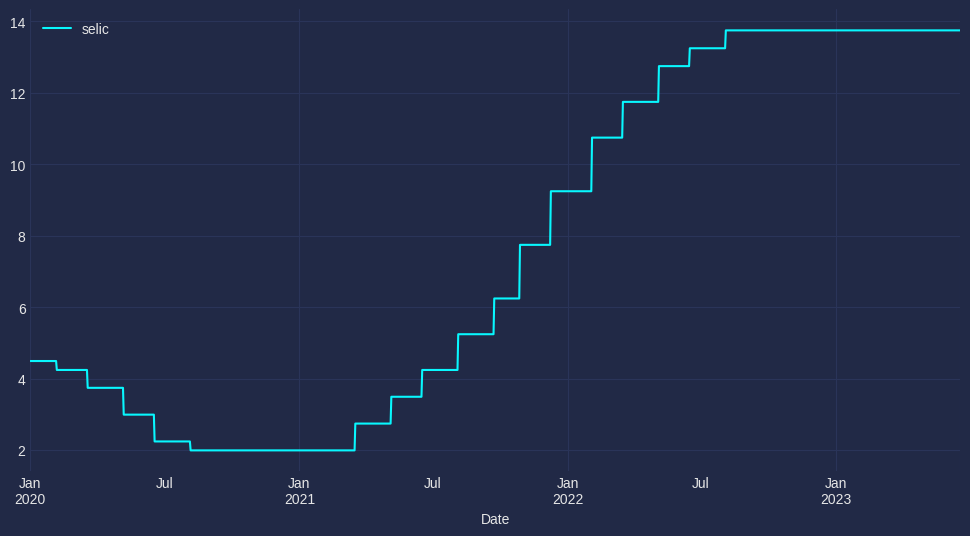

In [ ]:
selic.plot(figsize=(12, 6))

# **Extração Taxa Consignado Banco Central**

In [29]:
consignado_taxa = pd.read_csv('/content/drive/MyDrive/Dados/historicotaxajurosdiario.csv', sep=';')

In [31]:
consignado_taxa

,Posicao,Segmento,Modalidade,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno
0,1,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO CCB BRASIL S.A.,"1,56","20,34"
1,2,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO ARBI S.A.,"1,57","20,58"
2,3,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO DO EST. DO PA S.A.,"1,58","20,67"
3,4,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,NU FINANCEIRA S.A. CFI,"1,58","20,71"
4,5,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO DO NORDESTE DO BRASIL S.A.,"1,58","20,72"
5,6,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO ALFA S.A.,"1,59","20,84"
6,7,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BANCO INBURSA,"1,59","20,88"
7,8,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,CAIXA ECONOMICA FEDERAL,"1,61","21,13"
8,9,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,BCO COOPERATIVO SICREDI S.A.,"1,63","21,36"
9,10,Pessoa Física,Crédito pessoal consignado público - Pré-fixado,FINANC ALFA S.A. CFI,"1,64","21,49"


In [40]:
consignado_taxa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Posicao                41 non-null     int64 
 1   Segmento               41 non-null     object
 2   Modalidade             41 non-null     object
 3   InstituicaoFinanceira  41 non-null     object
 4   TaxaJurosAoMes         41 non-null     object
 5   TaxaJurosAoAno         41 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB
